In [1]:
import numpy as np
import mogp_emulator
import pickle
import matplotlib.pyplot as plt
#from scipy.stats import norm, randint 
from scipy.linalg import norm
import matplotlib
import time
font = { 'family' : 'sans-serif',
                'weight' : 'normal',
                'size'   : 12}
matplotlib.rc('font', **font)
import pandas as pd
# from helper_functions import (get_l_norm, get_l_norm_all_values,
#get_norm_val_for_norm, get_error, get_norm_error, get_norm_for_plot, get_param_err_plot, 
# get_norm_plot, print_results, get_validation_norms, get_full_intersec_res)
# from analysis_functions import (signif, get_arrays_for_gpe_verif, get_gpe_verif, get_subset_inds,intersection, 
# norms_test, get_best_params, get_append_arr, generate_results, get_run_name, append_results, power_selector,find_if_params_equal)
# from visualisation_functions import (get_l_norm, get_l_norm_all_values,
# get_norm_val_for_norm, get_error, get_norm_error, get_norm_for_plot, get_param_err_plot, 
# get_norm_plot, print_results, get_validation_norms, get_full_intersec_res)

from analysis_functions import *
from visualisation_functions import *

In [8]:
offset_cont = "_asymr"
# offset_cont = "_asyml"
data_dir_cont = 'hm_results'
gpow_cont = "" # empty string for det. power, otherwise use "_gpow_avex" or "_gpow_avx" 
num_hm_cont = '15000000'
gpe_control = ''
runs = ['', '_run2', '_run3','_run4','_run5',]
# snr_pens = [3001, 2001, 1001, 0.5001, 0.25001]
snr_pens = [3001]

In [ ]:
for sp in snr_pens:
    powers_cont, snrpen_cont = power_selector(sp, offset_cont)
    power_names_cont = [str(int(pow)) for pow in powers_cont]
    append_results(data_dir_cont, power_names_cont[0], power_names_cont[1], power_names_cont[2], power_names_cont[3],
                   power_names_cont[4], snrpen_cont,num_hm_cont,offset_cont, runs,
                   'analysis_results/detpowres_test.csv', gpe_control,gpow_cont, powers_cont, power_names_cont)

**Plot histograms to analyse the distribution of physical layer parameters**

In [ ]:
power_names_cont = [str(int(pow)) for pow in powers_cont]
intersec_res = get_full_intersec_res(data_dir_cont, power_names_cont[0], power_names_cont[1], power_names_cont[2],
                                     power_names_cont[3], power_names_cont[4], num_hm_cont, runs[0], 
                offset_cont, gpow_cont, gpe_control, powers_cont, power_names_cont)

In [ ]:
f, ax = plt.subplots()
plt.hist(intersec_res[:,1])
plt.xlabel("Alpha (dB/km)")
plt.ylabel("Frequency density")
plt.text(0.2, 0.95, '$\sigma$='+str(signif(np.std(intersec_res[:,1]),3)), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
plt.text(0.2, 0.85, '$\mu$='+str(signif(np.mean(intersec_res[:,1]),3)), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
#plt.xlim([])
#plt.ylim([0,0.003])
plt.grid()
#plt.legend(ncol=2, prop={'size':10}, loc=0)
f.patch.set_facecolor('w')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
# plt.savefig('figures/alpha_hist_'+str(snrpen_cont)+str(offset_cont)+str(gpow_cont)+'.pdf', dpi=200,bbox_inches='tight')
plt.show()

In [ ]:
f, ax = plt.subplots()
plt.hist(intersec_res[:,3])
plt.xlabel("Gamma (/W/km)")
plt.ylabel("Frequency density")
plt.text(0.2, 0.95, '$\sigma$='+str(signif(np.std(intersec_res[:,3]),3)), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
plt.text(0.2, 0.85, '$\mu$='+str(signif(np.mean(intersec_res[:,3]),3)), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
#plt.xlim([])
#plt.ylim([0,0.003])
plt.grid()
#plt.legend(ncol=2, prop={'size':10}, loc=0)
f.patch.set_facecolor('w')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
# plt.savefig('figures/gamma_hist_'+str(snrpen_cont)+str(offset_cont)+str(gpow_cont)+'.pdf', dpi=200,bbox_inches='tight')
plt.show()

In [ ]:
f, ax = plt.subplots()
plt.hist(intersec_res[:,4])
plt.xlabel("NF (dB)")
plt.ylabel("Frequency density")
plt.text(0.2, 0.95, '$\sigma$='+str(signif(np.std(intersec_res[:,4]),3)), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
plt.text(0.2, 0.85, '$\mu$='+str(signif(np.mean(intersec_res[:,4]),3)), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
#plt.xlim([])
#plt.ylim([0,0.003])
plt.grid()
#plt.legend(ncol=2, prop={'size':10}, loc=0)
f.patch.set_facecolor('w')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
# plt.savefig('figures/nf_hist_'+str(snrpen_cont)+str(offset_cont)+str(gpow_cont)+'.pdf', dpi=200,bbox_inches='tight')
plt.show()

In [ ]:
f, ax = plt.subplots()
plt.hist(intersec_res[:,5])
plt.xlabel("TRx B2B SNR (dB)")
plt.ylabel("Frequency density")
plt.text(0.2, 0.95, '$\sigma$='+str(signif(np.std(intersec_res[:,5]),3)), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
plt.text(0.2, 0.85, '$\mu$='+str(signif(np.mean(intersec_res[:,5]),3)), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
#plt.xlim([])
#plt.ylim([0,0.003])
plt.grid()
#plt.legend(ncol=2, prop={'size':10}, loc=0)
f.patch.set_facecolor('w')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
# plt.savefig('figures/b2b_hist_'+str(snrpen_cont)+str(offset_cont)+str(gpow_cont)+'.pdf', dpi=200,bbox_inches='tight')
plt.show()

Get validation results for a given launch power

In [2]:
gausspow_var_df = pd.read_csv('analysis_results/gausspowres_variance.csv')
gausspow_sam_df = pd.read_csv('analysis_results/gausspowres_wnorms.csv')
sams = np.array([1, 3, 5, 10, 30, 50, 100])

In [3]:
def get_validation_norms_lin(gpe_direc, val_powers, offset_name, norm_type, gpe_dir):
    """
    get validation results for each launch power
    """
    norms = np.zeros([len(val_powers),1])
    for i in range(len(val_powers)):
        #val_pts = pickle.load(open("saved_models/"+gpe_dir+"/validation_points_ssfm"+val_pow+offset+".pkl", 'rb'))
        pred = pickle.load(open(gpe_dir+"/predictions_ssfm"+val_powers[i]+offset_name+".pkl", 'rb'))
        val_out = pickle.load(open(gpe_dir+"/validation_output_ssfm"+val_powers[i]+offset_name+".pkl", 'rb'))
        norms[i] = norm((db2lin(pred.mean - val_out)), norm_type)
    return norms

In [4]:
gpe_dir = "saved_gpes"
# offset = "_asymr_hipres"
val_pows_r = ['-103', '-85', '-61', '-45', '-34', '-11', '10', '18', '27', '40', '49']
val_pows_l = ['-112', '-93', '-68', '-51', '-39', '-11', '9', '17', '28', '41', '50']
# l1_norms_r = get_validation_norms(gpe_dir, val_pows_r, "_asymr_hipres", 1, gpe_dir)
# l2_norms_r = get_validation_norms(gpe_dir, val_pows_r, "_asymr_hipres", 2, gpe_dir)
# l1_norms_l = get_validation_norms(gpe_dir, val_pows_l, "_asyml_hipres", 1, gpe_dir)
# l2_norms_l = get_validation_norms(gpe_dir, val_pows_l, "_asyml_hipres", 2, gpe_dir)
l1_norms_r = lin2db(get_validation_norms_lin(gpe_dir, val_pows_r, "_asymr_hipres", 1, gpe_dir)/20)
l2_norms_r = lin2db(get_validation_norms_lin(gpe_dir, val_pows_r, "_asymr_hipres", 2, gpe_dir)/20)
l1_norms_l = lin2db(get_validation_norms_lin(gpe_dir, val_pows_l, "_asyml_hipres", 1, gpe_dir)/20)
l2_norms_l = lin2db(get_validation_norms_lin(gpe_dir, val_pows_l, "_asyml_hipres", 2, gpe_dir)/20)
# l1_norms_r = get_validation_norms_lin(gpe_dir, val_pows_r, "_asymr_hipres", 1, gpe_dir)
# l2_norms_r = get_validation_norms_lin(gpe_dir, val_pows_r, "_asymr_hipres", 2, gpe_dir)
# l1_norms_l = get_validation_norms_lin(gpe_dir, val_pows_l, "_asyml_hipres", 1, gpe_dir)
# l2_norms_l = get_validation_norms_lin(gpe_dir, val_pows_l, "_asyml_hipres", 2, gpe_dir)

In [5]:
val_pows_r_ar = [float(pow)/10 for pow in val_pows_r]
val_pows_l_ar = [float(pow)/10 for pow in val_pows_l]

In [ ]:
# def get_validation_norms_test(gpe_direc, val_powers, offset_name, norm_type):
#     """
#     get validation results for each launch power
#     """
#     norms = np.zeros([len(val_powers),1])
#     frac_stds = np.zeros([len(val_powers),1])
#     pred_means = np.zeros([len(val_powers),1])
#     pred_stds = np.zeros([len(val_powers),1])
#     for i in range(len(val_powers)):    
#         #val_pts = pickle.load(open("saved_models/"+gpe_dir+"/validation_points_ssfm"+val_pow+offset+".pkl", 'rb'))
#         pred = pickle.load(open(gpe_dir+"/predictions_ssfm"+val_powers[i]+offset_name+".pkl", 'rb'))
#         frac_stds[i] = np.mean((pred.unc**0.5)/pred.mean)
#         pred_means[i] = np.mean(pred.mean)
#         pred_stds[i] = np.mean(pred.unc**0.5)
# #         print(np.mean(pred.unc**0.5))
#         val_out = pickle.load(open(gpe_dir+"/validation_output_ssfm"+val_powers[i]+offset_name+".pkl", 'rb'))
# #         print(val_out[0])
#         norms[i] = norm((pred.mean - val_out), norm_type)
#     return norms, pred_means, val_out, frac_stds, pred_stds

In [6]:
def get_validation_norms_test(gpe_direc, val_powers, offset_name, norm_type):
    """
    get validation results for each launch power
    """
    norms = np.zeros([len(val_powers),1])
    frac_stds = np.zeros([len(val_powers),1])
    pred_means = np.zeros([len(val_powers),20])
    pred_stds = np.zeros([len(val_powers),1])
    val_outs = np.zeros([len(val_powers),20])
    for i in range(len(val_powers)):    
        #val_pts = pickle.load(open("saved_models/"+gpe_dir+"/validation_points_ssfm"+val_pow+offset+".pkl", 'rb'))
        pred = pickle.load(open(gpe_dir+"/predictions_ssfm"+val_powers[i]+offset_name+".pkl", 'rb'))
        frac_stds[i] = np.mean((db2lin(pred.unc)**0.5)/db2lin(pred.mean))
        pred_means[i] = pred.mean
        pred_stds[i] = np.mean(pred.unc**0.5)
        val_out = pickle.load(open(gpe_dir+"/validation_output_ssfm"+val_powers[i]+offset_name+".pkl", 'rb'))
        val_outs[i] = val_out
#         print(val_out.shape)
#         print(pred.mean.shape)
        norms[i] = norm((db2lin(pred.mean - val_out)), norm_type)  # can't use norm function for dB
#         abs(db2lin(pred.mean - val_out))
    return norms, pred_means, val_outs, frac_stds, pred_stds

In [9]:
norms, val_pred_means, val_gts, val_pred_stds_frac, val_pred_stds = get_validation_norms_test(data_dir_cont, val_pows_r, "_asymr_hipres", 1)
val_pred_stds_frac = val_pred_stds_frac*100 # express fractional std as a percentage of the predictive mean

In [10]:
def calculate_max_error_db(ground_truths, predictions):
    num_pow = ground_truths.shape[0]
    max_err = []
    for i in range(num_pow):
        max_err.append(np.max(abs(ground_truths[i] - predictions[i])))
    return max_err

In [11]:
max_errs = calculate_max_error_db(val_gts, val_pred_means)

In [ ]:
np.argmax(max_errs)

In [ ]:
[np.argmax(abs(val_gts[0] - val_pred_means[0]))]

In [ ]:
(abs(db2lin(val_gts[0][17]) - db2lin(val_pred_means[0][17]))/db2lin(val_pred_means[0][17]))*100

In [ ]:
f, ax = plt.subplots()
plt.plot(val_pows_r_ar,l1_norms_r, 'r^', label='L1')
# plt.plot(val_pows_r_ar,l2_norms_r, 'bP', label='L2')
# plt.plot(val_pows_l_ar,l1_norms_l, 'b--', label='L1 L')
# plt.plot(val_pows_l_ar,l2_norms_l, 'b:', label='L2 L')
plt.ylabel("Mean SNR error (dB)")
plt.xlabel("Launch power (dBm)")
plt.xlim([val_pows_r_ar[0]-0.5, val_pows_r_ar[-1]+0.5])
# plt.ylim([-30,-18])
plt.grid()
plt.legend(ncol=2, prop={'size':12}, loc=0)
f.patch.set_facecolor('w')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('figures/val_norms_vs_launch_power_right.png', dpi=500,bbox_inches='tight')
plt.show()

In [ ]:
np.max(l1_norms_r)

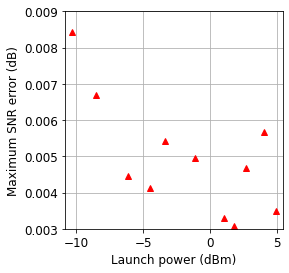

In [12]:
f, ax = plt.subplots()
plt.plot(val_pows_r_ar, max_errs, 'r^', label='Max error')
# plt.plot(val_pows_r_ar, , 'bP', label='L2')
# plt.plot(val_pows_l_ar,l1_norms_l, 'b--', label='L1 L')
# plt.plot(val_pows_l_ar,l2_norms_l, 'b:', label='L2 L')
plt.ylabel("Maximum SNR error (dB)")
plt.xlabel("Launch power (dBm)")
plt.xlim([val_pows_r_ar[0]-0.5, val_pows_r_ar[-1]+0.5])
plt.ylim([0.003,0.009])
plt.grid()
# plt.legend(ncol=2, prop={'size':12}, loc=0)
f.patch.set_facecolor('w')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('figures/val_norms_vs_launch_power_right_max.png', dpi=500,bbox_inches='tight')
plt.show()

In [ ]:
8.4*10**(-3)

In [ ]:
plt.rcParams['text.usetex'] = False
f, ax = plt.subplots()
plt.plot(val_pows_r_ar, val_pred_stds_frac, 'g^')
plt.ylabel("Predictive standard deviation (%)")
plt.xlabel("Launch power (dBm)")
plt.xlim([val_pows_r_ar[0]-0.5, val_pows_r_ar[-1]+0.5])
# plt.ylim([0,0.003])
plt.grid()
# plt.legend(ncol=2, prop={'size':12}, loc=0)
f.patch.set_facecolor('w')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('figures/fractional_predictive_std_validation.png', dpi=500,bbox_inches='tight')
plt.show()

In [ ]:
val_pred_stds

In [ ]:
val_conf_p = val_pred_means + 3*val_pred_stds
val_conf_n = val_pred_means - 3*val_pred_stds

In [ ]:
f, ax = plt.subplots()
plt.plot(val_pows_r_ar, val_pred_means, 'rx')
ax.fill(np.concatenate([val_pows_r_ar, val_pows_r_ar[::-1]]),
            np.concatenate([val_conf_p,
                            (val_conf_n)[::-1]]),
            alpha=0.3, fc='r', ec='None', label='3$\sigma$ confidence')
plt.ylabel("Predictive standard deviation (%)")
plt.xlabel("Launch power (dBm)")
plt.xlim([val_pows_r_ar[0]-0.5, val_pows_r_ar[-1]+0.5])
# plt.ylim([0,0.003])
plt.grid()
# plt.legend(ncol=2, prop={'size':12}, loc=0)
f.patch.set_facecolor('w')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
# plt.savefig('figures/fractional_predictive_std_validation.png', dpi=500,bbox_inches='tight')
plt.show()

Plot dataset used:

In [ ]:
ground_truth_sim = pickle.load(open("gt_data/ssfm_full_power_ground_truth_sim_hipres.pkl", 'rb')).reshape(211,)
power_exp = np.arange(-15., 6.1, 0.1)
x_lin = power_exp[139]*np.ones([7,])
y_lin = np.arange(9,16,1)

In [ ]:
f, ax = plt.subplots()
plt.plot(power_exp, ground_truth_sim, 'deepskyblue')
plt.xlabel("Launch power (dBm)")
plt.ylabel("SNR (dB)")
plt.grid()
plt.text(0.25, 0.95, 'Linear', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
plt.text(0.25, 0.90, 'regime', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
plt.text(0.85, 0.95, 'Nonlinear', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
plt.text(0.85, 0.90, 'regime', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
# plt.text(0.2, 0.95, 'towards linear regime', horizontalalignment='center',
#      verticalalignment='center', transform=ax.transAxes, fontsize = 12)
plt.plot(x_lin, y_lin, 'k--')
# plt.plot(power_exp[38], ground_truth_sim[38], 'b^', label='3 dB L') # -11.2 (3db) L
plt.plot(power_exp[47], ground_truth_sim[47], 'r^', label='3 dB') # -10.3 (3db) R
# plt.plot(power_exp[56], ground_truth_sim[56], 'b^', label='2 dB L') # -9.4 (2db) L
plt.plot(power_exp[65], ground_truth_sim[65], 'bX', label='2 dB') # -8.5 (2db) R
# plt.plot(power_exp[80], ground_truth_sim[80], 'b^', label='1 dB L') # -7.0 (1db) L
plt.plot(power_exp[88], ground_truth_sim[88], 'mP', label='1 dB') # -6.2 (1db) R
plt.plot(power_exp[105], ground_truth_sim[105], 'g>', label='0.5 dB') # -4.5 (0.5db) R
plt.plot(power_exp[116], ground_truth_sim[116],'y<', label='0.25 dB') # -3.4 (0.25db) R
plt.plot(power_exp[139], ground_truth_sim[139], 'k*', label='Peak') # -1.1 (all) R
plt.plot(power_exp[160], ground_truth_sim[160], 'y<') # 1.0 (0.25db) R
plt.plot(power_exp[168], ground_truth_sim[168], 'g>') # 1.8 (0.5db) R
plt.plot(power_exp[177], ground_truth_sim[177], 'mP') # 2.7 (1db)  R
plt.plot(power_exp[190], ground_truth_sim[190], 'bX') # 4.0 (2db)  R 
plt.plot(power_exp[199], ground_truth_sim[199], 'r^') # 4.9 (3db)  R 
# plt.plot(power_exp[178], ground_truth_sim[178], 'mP') # 2.8 (1db)  L
# plt.plot(power_exp[191], ground_truth_sim[191], 'bX') # 4.1 (2db)  L 
# plt.plot(power_exp[200], ground_truth_sim[200], 'r^') # 5.0 (3db)  L 
plt.xlim([-12, 6])
plt.ylim([10, 14])
plt.legend(ncol=1, prop={'size':12}, loc=0)
f.patch.set_facecolor('w')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
#plt.savefig('figures/ground_truth_data_det_power_right.png', dpi=500,bbox_inches='tight')
plt.show()

In [ ]:
ground_truth_sim

Get hyperparameter values for GPEs

In [ ]:
# power_value = '-103'
# y_gt = ground_truth_sim[47]*np.ones([100,1])
power_value = '-11'
y_gt = ground_truth_sim[139]*np.ones([100,1])
# power_value = '49'
# y_gt = ground_truth_sim[199]*np.ones([100,1])
# power_value = '40'
# y_gt = ground_truth_sim[190]*np.ones([100,1])
# power_value = '27'
# y_gt = ground_truth_sim[177]*np.ones([100,1])
# power_value = '18'
# y_gt = ground_truth_sim[168]*np.ones([100,1])
# power_value = '10'
# y_gt = ground_truth_sim[160]*np.ones([100,1])


# power_value = '-85'
# power_value = '-62'
# power_value = '40'

gpe_model = pickle.load(open("saved_gpes/fitted_GPE_ssfm"+power_value+"_asymr_hipres.pkl",'rb'))
print(gpe_model.theta)

In [ ]:
gpe_model.predict(0.2, 1.2, 4.5, 14.8)

In [ ]:
gpe_model.theta

NOTE: these values may be incorrect - check docs: https://mogp-emulator.readthedocs.io/en/latest/implementation/GPParams.html#mogp_emulator.GPParams.GPParams

In [ ]:
# print("Correlation length alpha = ", np.exp(-gpe_model.theta[0])**0.5)
# print("Correlation length gamma = ", np.exp(-gpe_model.theta[1])**0.5)
# print("Correlation length NF = ", np.exp(-gpe_model.theta[2])**0.5)
# print("Correlation length b2b = ", np.exp(-gpe_model.theta[3])**0.5)
print("Correlation length alpha = ", np.exp(-(gpe_model.theta[0]/2))**0.5)
print("Correlation length gamma = ", np.exp(-(gpe_model.theta[1]/2))**0.5)
print("Correlation length NF = ", np.exp(-(gpe_model.theta[2])/2)**0.5)
print("Correlation length b2b = ", np.exp(-(gpe_model.theta[3])/2)**0.5)
print("Covariance scale = ", np.exp(gpe_model.theta[4])**0.5)
print("Noise sigma = ", gpe_model.nugget**0.5)

In [ ]:
def get_hyperparameters(power_value):
    gp = pickle.load(open("saved_gpes/fitted_GPE_ssfm"+power_value+"_asymr_hipres.pkl",'rb'))
    alpha_cl, gamma_cl, nf_cl, btb_cl, cov_scale, _ = gp.theta
    noise_sigma = gp.nugget**0.5
    return np.array([alpha_cl, gamma_cl, nf_cl, btb_cl, cov_scale, noise_sigma])

In [ ]:
hyperparams = np.zeros([11,6])
hyperparams[0,:]
power_values = ['-103', '-85', '-62', '-45', '-34', '-11', '10', '18', '27', '40', '49']
for i, power_val in enumerate(power_values):
    hyperparams[i,:] = get_hyperparameters(power_val)
hyperparams.shape

In [ ]:
cl_alphas = [np.exp(-i/2)**0.5 for i in hyperparams[:,0]]
cl_gammas = [np.exp(-i/2)**0.5 for i in hyperparams[:,1]]
cl_nfs = [np.exp(-i/2)**0.5 for i in hyperparams[:,2]]
cl_btbs = [np.exp(-i/2)**0.5 for i in hyperparams[:,3]]
h1s = [np.exp(i)**0.5 for i in hyperparams[:,4]]
h2s = hyperparams[:,5]
powers_plt = [-10.3, -8.5, -6.2, -4.5, -3.4, -1.1, 1.0, 1.8, 2.7, 4.0, 4.9]

In [ ]:
f, ax = plt.subplots()
plt.plot(powers_plt, cl_alphas, 'r^')
plt.xlabel("Launch power (dBm)")
plt.ylabel("Loss CL (dB$\cdot$km$^{-1}$)")
# plt.xlim(powers_plt[0], powers_plt[-1])
plt.xlim([-12, 6])
# plt.ylim([0.14, 0.26])
plt.grid()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('figures/corr_lengths_alpha.jpeg', dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
f, ax = plt.subplots()
plt.plot(powers_plt, cl_gammas, 'r^')
plt.xlabel("Launch power (dBm)")
plt.ylabel("Nonlinearity coeff. CL (W$^{-1}$ $\cdot$ km$^{-1}$)")
plt.xlim([-12, 6])
# plt.ylim([1, 22.5])
plt.grid()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('figures/corr_lengths_gamma.jpeg', dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
f, ax = plt.subplots()
plt.plot(powers_plt, cl_nfs, 'r^')
plt.xlabel("Launch power (dBm)")
plt.ylabel("NF CL (dB)")
plt.xlim([-12, 6])
# plt.ylim([2, 16])
plt.grid()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('figures/corr_lengths_nf.jpeg', dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
f, ax = plt.subplots()
plt.plot(powers_plt, cl_btbs, 'r^')
plt.xlabel("Launch power (dBm)")
plt.ylabel("BTB CL (dB)")
plt.xlim([-12, 6])
# plt.ylim([2, 14])
plt.grid()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('figures/corr_lengths_btb.jpeg', dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
f, ax = plt.subplots()
plt.plot(powers_plt, h1s, 'r^')
plt.xlabel("Launch power (dBm)")
plt.ylabel("Overall covariance length (dB)")
# plt.xlim(powers_plt[0], powers_plt[-1])
plt.xlim([-12, 6])
plt.ylim([2.5, 7.0])
plt.grid()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('figures/covariance_lengths.jpeg', dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
f, ax = plt.subplots()
plt.plot(powers_plt, h2s, 'r^')
plt.xlabel("Launch power (dBm)")
plt.ylabel("Noise level (dB)")
# plt.xlim(powers_plt[0], powers_plt[-1])
plt.xlim([-12, 6])
plt.ylim([0.0025, 0.007])
plt.grid()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('figures/noise_levels.jpeg', dpi=300,bbox_inches='tight')
plt.show()

Plot GPE parameter sweep

In [ ]:
def sweep_alpha(low, high, numpts, gamma, nf, btb, gp):
    alphas = np.linspace(low,high,numpts).reshape(numpts,1)
    gammas = (np.ones(numpts)*gamma).reshape(numpts,1)
    nfs = (np.ones(numpts)*nf).reshape(numpts,1)
    btbs = (np.ones(numpts)*btb).reshape(numpts,1)
    args = np.concatenate((alphas, gammas, nfs, btbs),axis=1)
    return alphas, gp.predict(args)[0], gp.predict(args)[1]**0.5
def sweep_gamma(low, high, numpts, alpha, nf, btb, gp):
    gammas = np.linspace(low,high,numpts).reshape(numpts,1)
    alphas = (np.ones(numpts)*alpha).reshape(numpts,1)
    nfs = (np.ones(numpts)*nf).reshape(numpts,1)
    btbs = (np.ones(numpts)*btb).reshape(numpts,1)
    args = np.concatenate((alphas, gammas, nfs, btbs),axis=1)
    return gammas, gp.predict(args)[0], gp.predict(args)[1]**0.5
def sweep_nf(low, high, numpts, alpha, gamma, btb, gp):
    nfs = np.linspace(low,high,numpts).reshape(numpts,1)
    alphas = (np.ones(numpts)*alpha).reshape(numpts,1)
    gammas = (np.ones(numpts)*gamma).reshape(numpts,1)
    btbs = (np.ones(numpts)*btb).reshape(numpts,1)
    args = np.concatenate((alphas, gammas, nfs, btbs),axis=1)
    return nfs, gp.predict(args)[0], gp.predict(args)[1]**0.5
def sweep_btb(low, high, numpts, alpha, gamma, nf, gp):
    btbs = np.linspace(low,high,numpts).reshape(numpts,1)
    alphas = (np.ones(numpts)*alpha).reshape(numpts,1)
    gammas = (np.ones(numpts)*gamma).reshape(numpts,1)
    nfs = (np.ones(numpts)*nf).reshape(numpts,1)
    args = np.concatenate((alphas, gammas, nfs, btbs),axis=1)
    return btbs, gp.predict(args)[0], gp.predict(args)[1]**0.5

In [ ]:
alpha, gamma, nf, btb =   0.2, 1.2, 4.5, 14.8
alpha_sweep_range_low, alpha_sweep_range_high = 0.19,0.22
gamma_sweep_range_low, gamma_sweep_range_high = 1.0, 1.5
nf_sweep_range_low, nf_sweep_range_high = 4.3, 4.8
btb_sweep_range_low, btb_sweep_range_high = 14.5, 15.2

alphas, alpha_sweep, alpha_sweep_unc = sweep_alpha(alpha_sweep_range_low,alpha_sweep_range_high,100, gamma, nf, btb, gpe_model)
gammas, gamma_sweep, gamma_sweep_unc = sweep_gamma(gamma_sweep_range_low,gamma_sweep_range_high,100, alpha, nf, btb, gpe_model)
nfs, nf_sweep, nf_sweep_unc = sweep_nf(nf_sweep_range_low,nf_sweep_range_high,100, alpha, gamma, btb, gpe_model)
btbs, btb_sweep, btb_sweep_unc = sweep_btb(btb_sweep_range_low,btb_sweep_range_high,100, alpha, gamma, nf, gpe_model)

alpha_sweep_confp = alpha_sweep + 3*alpha_sweep_unc
alpha_sweep_confn = alpha_sweep - 3*alpha_sweep_unc
gamma_sweep_confp = gamma_sweep + 3*gamma_sweep_unc
gamma_sweep_confn = gamma_sweep - 3*gamma_sweep_unc
nf_sweep_confp = nf_sweep + 3*nf_sweep_unc
nf_sweep_confn = nf_sweep - 3*nf_sweep_unc
btb_sweep_confp = btb_sweep + 3*btb_sweep_unc
btb_sweep_confn = btb_sweep - 3*btb_sweep_unc

In [ ]:
power_value

In [ ]:
f, ax = plt.subplots()
plt.plot(alphas, alpha_sweep)
plt.plot(alphas, y_gt, 'k--', label='Ground truth')
ax.fill(np.concatenate([alphas, alphas[::-1]]),
            np.concatenate([alpha_sweep_confp,
                            (alpha_sweep_confn)[::-1]]),
            alpha=0.3, fc='r', ec='None', label='3$\sigma$ confidence')
plt.xlabel("Fibre loss (dB km$^{-1}$)")
plt.ylabel("SNR (dB)")
plt.xlim([alphas[0],alphas[-1]])
# plt.ylim([9.75, 11.75])
plt.ylim([13.55,14.0])
# plt.ylim([10.7,11.5])
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.grid()
plt.legend()
plt.savefig('figures/'+power_value+'_alphasweep.jpeg', dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
f, ax = plt.subplots()
plt.plot(gammas, gamma_sweep)
plt.plot(gammas, y_gt, 'k--', label='Ground truth')
ax.fill(np.concatenate([gammas, gammas[::-1]]),
            np.concatenate([gamma_sweep_confp,
                            (gamma_sweep_confn)[::-1]]),
            alpha=0.3, fc='r', ec='None', label='3$\sigma$ confidence')
plt.xlabel("Nonlinearity coefficient (W$^{-1}$ km$^{-1}$)")
plt.ylabel("SNR (dB)")
plt.xlim([gammas[0],gammas[-1]])
# plt.ylim([11.11,11.16])
plt.ylim([13.65,14])
# plt.ylim([9.5,12])
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.grid()
plt.legend()
plt.savefig('figures/'+power_value+'_gammasweep.jpeg', dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
f, ax = plt.subplots()
plt.plot(nfs, nf_sweep)
plt.plot(nfs, y_gt, 'k--', label='Ground truth')
ax.fill(np.concatenate([nfs, nfs[::-1]]),
            np.concatenate([nf_sweep_confp,
                            (nf_sweep_confn)[::-1]]),
            alpha=0.3, fc='r', ec='None', label='3$\sigma$ confidence')
plt.xlabel("Amplifier NF (dB)")
plt.ylabel("SNR (dB)")
plt.xlim([nfs[0],nfs[-1]])
# plt.ylim([10.9,11.3])
# plt.ylim([13.8,13.92])
# plt.ylim(10.97,11.005)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.grid()
plt.legend()
plt.savefig('figures/'+power_value+'_nfsweep.jpeg', dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
f, ax = plt.subplots()
plt.plot(btbs, btb_sweep)
plt.plot(btbs, y_gt, 'k--', label='Ground truth')
ax.fill(np.concatenate([btbs, btbs[::-1]]),
            np.concatenate([btb_sweep_confp,
                            (btb_sweep_confn)[::-1]]),
            alpha=0.3, fc='r', ec='None', label='3$\sigma$ confidence')
plt.xlabel("TRx BTB (dB)")
plt.ylabel("SNR (dB)")
plt.xlim([btbs[0],btbs[-1]])
ax.set_xticks([14.5,14.6,14.7,14.8,14.9,15, 15.1, 15.2])
# plt.ylim([10.95,11.35])
# plt.ylim([13.6,14.2])
# plt.ylim([10.85,11.2])
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.grid()
plt.legend()
plt.savefig('figures/'+power_value+'_btbsweep.jpeg', dpi=300,bbox_inches='tight')
plt.show()

Get predictive variance of GPE models

In [ ]:
def lin2db(x):
    return 10*np.log10(x)
def db2lin(x):
    return 10**(x/10)
def get_gpe_pred(power, alpha, nf, gamma, b2b):
    gpe_model = pickle.load(open("saved_gpes/fitted_GPE_ssfm"+power+"_asymr_hipres.pkl",'rb'))
    preds = gpe_model.predict([alpha, nf, gamma, b2b])
    return preds.mean, preds.unc**0.5

In [ ]:
get_gpe_pred('-103', 0.2, 1.2, 4.5, 14.8)[0]

In [ ]:
abs(get_gpe_pred('-103', 0.2, 1.2, 4.5, 14.8)[0] - ground_truth_sim[47])

In [ ]:
abs(get_gpe_pred('-85', 0.2, 1.2, 4.5, 14.8)[0] - ground_truth_sim[65])

In [ ]:
abs(get_gpe_pred('-62',0.2, 1.2, 4.5, 14.8)[0] - ground_truth_sim[88])

In [ ]:
abs(get_gpe_pred('-45', 0.2, 1.2, 4.5, 14.8)[0] - ground_truth_sim[105])

In [ ]:
abs(get_gpe_pred('-34', 0.2, 1.2, 4.5, 14.8)[0] - ground_truth_sim[116])

In [ ]:
abs(get_gpe_pred('-11', 0.2, 1.2, 4.5, 14.8)[0] - ground_truth_sim[139])

In [ ]:
abs(get_gpe_pred('10', 0.2, 1.2, 4.5, 14.8)[0] - ground_truth_sim[160])

In [ ]:
abs(get_gpe_pred('18', 0.2, 1.2, 4.5, 14.8)[0] - ground_truth_sim[168])

In [ ]:
abs(get_gpe_pred('27', 0.2, 1.2, 4.5, 14.8)[0] - ground_truth_sim[177])

In [ ]:
abs(get_gpe_pred('40', 0.2, 1.2, 4.5, 14.8)[0] - ground_truth_sim[190])

In [ ]:
abs(get_gpe_pred('49', 0.2, 1.2, 4.5, 14.8)[0] - ground_truth_sim[199])

In [ ]:
plt.plot(power_exp[105], ground_truth_sim[105], 'g>', label='0.5 dB') # -4.5 (0.5db) R
plt.plot(power_exp[116], ground_truth_sim[116],'y<', label='0.25 dB') # -3.4 (0.25db) R
plt.plot(power_exp[139], ground_truth_sim[139], 'k*', label='Peak') # -1.1 (all) R
plt.plot(power_exp[160], ground_truth_sim[160], 'y<') # 1.0 (0.25db) R
plt.plot(power_exp[168], ground_truth_sim[168], 'g>') # 1.8 (0.5db) R
plt.plot(power_exp[177], ground_truth_sim[177], 'mP') # 2.7 (1db)  R
plt.plot(power_exp[190], ground_truth_sim[190], 'bX') # 4.0 (2db)  R 
plt.plot(power_exp[199], ground_truth_sim[199], 'r^') # 4.9 (3db)  R 

In [ ]:
pip list